--- Running Simulation ---
--- Simulation Finished ---


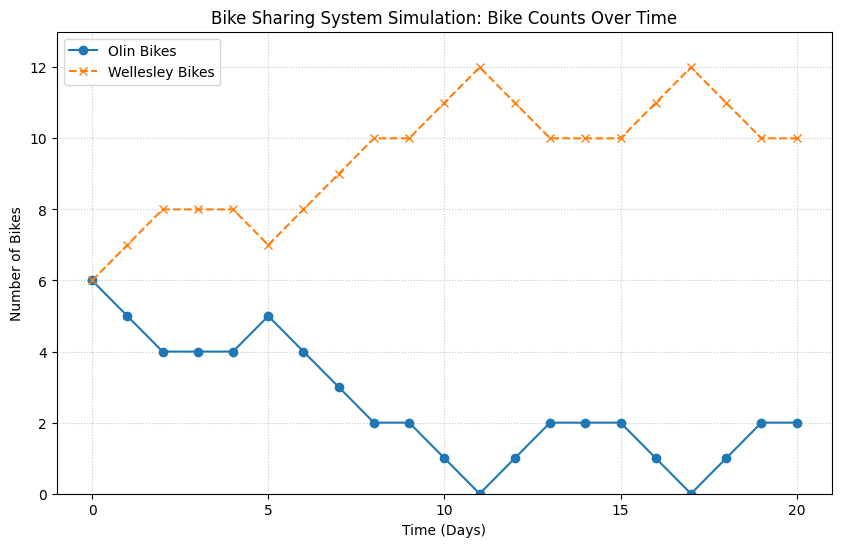

In [13]:
import random
import matplotlib.pyplot as plt

# --- 1. Initial State Setup ---
# System configuration based on the problem description
state = {
    'olin_bikes': 6,       # Initial bikes at Olin
    'wellesley_bikes': 6,  # Initial bikes at Wellesley
    'total_bikes': 12      # Total bikes in the system
}

# --- 2. Movement Functions ---

def move_bike(current_state, origin, destination):
    """
    Simulates one bike moving from origin to destination.
    A move only occurs if there is a bike at the origin.
    """
    if current_state[f'{origin}_bikes'] > 0:
        current_state[f'{origin}_bikes'] -= 1
        current_state[f'{destination}_bikes'] += 1
    return current_state

def time_step(current_state, prob_o_to_w, prob_w_to_o):
    """
    Simulates one day (time step) of bike movement based on probabilities.
    """
    # Attempt movement from Olin to Wellesley
    if random.random() < prob_o_to_w:
        current_state = move_bike(current_state, 'olin', 'wellesley')

    # Attempt movement from Wellesley to Olin
    if random.random() < prob_w_to_o:
        current_state = move_bike(current_state, 'wellesley', 'olin')

    return current_state

# --- 3. Simulation Setup ---
num_days = 20  # Total simulation duration
# Asymmetrical travel probabilities (Olin -> Wellesley is more likely)
PROB_O_TO_W = 0.5
PROB_W_TO_O = 0.5

# Lists to store historical data for visualization
olin_history = [state['olin_bikes']]
wellesley_history = [state['wellesley_bikes']]

# --- 4. Simulation Loop ---
current_state = state.copy() # Start with the initial state

print("--- Running Simulation ---")
for day in range(1, num_days + 1):
    current_state = time_step(current_state, PROB_O_TO_W, PROB_W_TO_O)

    # Record the results
    olin_history.append(current_state['olin_bikes'])
    wellesley_history.append(current_state['wellesley_bikes'])

    # Optional console output
    # print(f"Day {day:2d}: Olin={current_state['olin_bikes']}, Wellesley={current_state['wellesley_bikes']}")

print("--- Simulation Finished ---")


# --- 5. Visualization ---
days = range(num_days + 1) # Range from Day 0 to num_days

plt.figure(figsize=(10, 6))

# Plot Olin bike count history
plt.plot(days, olin_history, label='Olin Bikes', marker='o', linestyle='-')

# Plot Wellesley bike count history
plt.plot(days, wellesley_history, label='Wellesley Bikes', marker='x', linestyle='--')

# Set graph labels and title in English
plt.title('Bike Sharing System Simulation: Bike Counts Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Bikes')
plt.ylim(0, state['total_bikes'] + 1)
plt.xticks(range(0, num_days + 1, 5))
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

## 2. 100번 Trials

--- Running 100 Simulations (Each 20 Days) ---

--- Simulation Results (Average over 100 Runs) ---
Number of Iterations: 100
Probability Olin -> Wellesley: 0.5
Average Final Olin Bikes: 6.13
Average Final Wellesley Bikes: 5.87


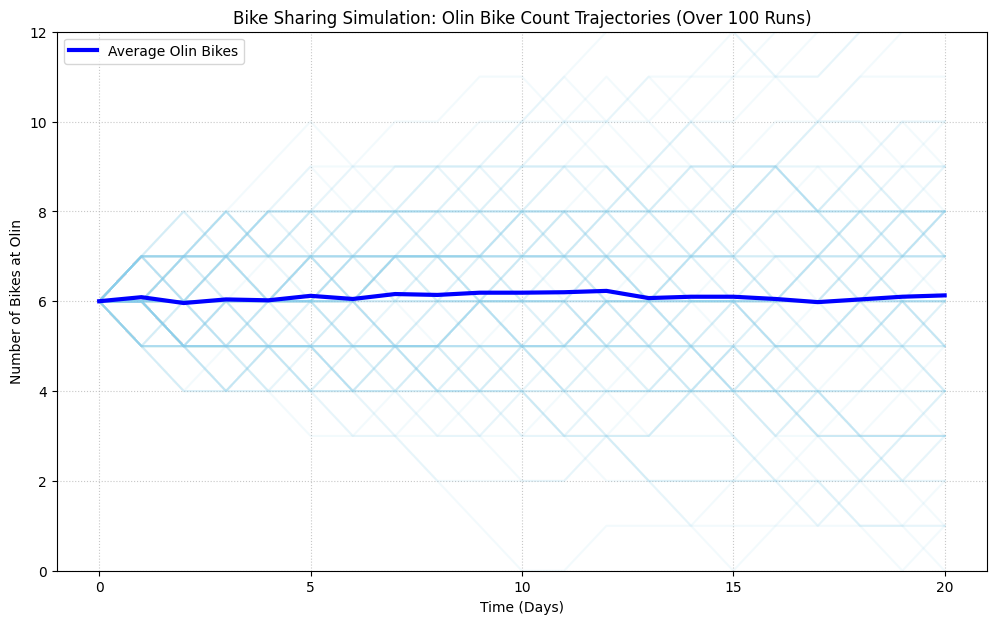

In [15]:
import random
import matplotlib.pyplot as plt

# --- 1. Initial State Setup ---
INITIAL_STATE = {
    'olin_bikes': 6,       # Initial bikes at Olin
    'wellesley_bikes': 6,  # Initial bikes at Wellesley
    'total_bikes': 12      # Total bikes in the system
}

# --- 2. Movement Functions (No Change) ---
def move_bike(current_state, origin, destination):
    """
    Simulates one bike moving from origin to destination.
    """
    if current_state[f'{origin}_bikes'] > 0:
        current_state[f'{origin}_bikes'] -= 1
        current_state[f'{destination}_bikes'] += 1
    return current_state

def time_step(current_state, prob_o_to_w, prob_w_to_o):
    """
    Simulates one day (time step) of bike movement based on probabilities.
    """
    # Attempt movement from Olin to Wellesley
    if random.random() < prob_o_to_w:
        current_state = move_bike(current_state, 'olin', 'wellesley')

    # Attempt movement from Wellesley to Olin
    if random.random() < prob_w_to_o:
        current_state = move_bike(current_state, 'wellesley', 'olin')

    return current_state

# --- 3. Simulation & Iteration Setup ---
NUM_ITERATIONS = 100     # Number of times to run the simulation
NUM_DAYS = 20          # Duration of each simulation run

# Asymmetrical travel probabilities (Olin -> Wellesley is more likely)
PROB_O_TO_W = 0.5
PROB_W_TO_O = 0.5

# Variables to accumulate the final results
final_olin_sum = 0
final_wellesley_sum = 0
final_history = [] # To store all Olin bike counts over the 100 runs for visualization

# --- 4. 100-Run Iteration Loop ---
print(f"--- Running {NUM_ITERATIONS} Simulations (Each {NUM_DAYS} Days) ---")

for i in range(NUM_ITERATIONS):
    # Start each run from the INITIAL_STATE
    current_state = INITIAL_STATE.copy()

    # History for the current run (Day 0)
    current_olin_history = [current_state['olin_bikes']]

    # Run the simulation for NUM_DAYS
    for day in range(1, NUM_DAYS + 1):
        current_state = time_step(current_state, PROB_O_TO_W, PROB_W_TO_O)
        current_olin_history.append(current_state['olin_bikes'])

    # After NUM_DAYS, accumulate final counts
    final_olin_sum += current_state['olin_bikes']
    final_wellesley_sum += current_state['wellesley_bikes']

    # Store history for visualization (e.g., storing Olin history for plotting)
    final_history.append(current_olin_history)


# --- 5. Calculation of Averages ---
average_final_olin = final_olin_sum / NUM_ITERATIONS
average_final_wellesley = final_wellesley_sum / NUM_ITERATIONS

print("\n--- Simulation Results (Average over 100 Runs) ---")
print(f"Number of Iterations: {NUM_ITERATIONS}")
print(f"Probability Olin -> Wellesley: {PROB_O_TO_W}")
print(f"Average Final Olin Bikes: {average_final_olin:.2f}")
print(f"Average Final Wellesley Bikes: {average_final_wellesley:.2f}")

# --- 6. Visualization (Plotting all 100 runs) ---
days = range(NUM_DAYS + 1)

plt.figure(figsize=(12, 7))

# Plot all 100 runs lightly in the background
for history in final_history:
    plt.plot(days, history, color='skyblue', alpha=0.1)

# Calculate and plot the mean (average) trajectory
mean_olin_trajectory = [sum(history[d] for history in final_history) / NUM_ITERATIONS for d in range(NUM_DAYS + 1)]
plt.plot(days, mean_olin_trajectory, color='blue', linewidth=3, label='Average Olin Bikes')

# Graph settings
plt.title(f'Bike Sharing Simulation: Olin Bike Count Trajectories (Over {NUM_ITERATIONS} Runs)')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Bikes at Olin')
plt.ylim(0, INITIAL_STATE['total_bikes'])
plt.xticks(range(0, NUM_DAYS + 1, 5))
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

## 3. Modules

In [19]:
%%writefile bikeshare_model.py

import random

class BikeShareModel:
    """
    자전거 공유 시스템의 상태와 이동 규칙을 관리하는 클래스입니다.
    """
    def __init__(self, initial_state, prob_o_to_w, prob_w_to_o):
        """초기 상태와 확률로 모델을 초기화합니다."""
        self.state = initial_state.copy()
        self.prob_o_to_w = prob_o_to_w
        self.prob_w_to_o = prob_w_to_o
        self.history = [self.state['olin_bikes']] # Olin 자전거 수 궤적 기록

    def _move_bike(self, origin, destination):
        """내부 메서드: 한 대의 자전거를 이동시킵니다."""
        if self.state[f'{origin}_bikes'] > 0:
            self.state[f'{origin}_bikes'] -= 1
            self.state[f'{destination}_bikes'] += 1

    def time_step(self):
        """
        하루(1 Time Step) 동안의 이동을 시뮬레이션하고 상태를 기록합니다.
        """
        # Olin -> Wellesley
        if random.random() < self.prob_o_to_w:
            self._move_bike('olin', 'wellesley')

        # Wellesley -> Olin
        if random.random() < self.prob_w_to_o:
            self._move_bike('wellesley', 'olin')

        # 하루 종료 후 Olin 자전거 수를 궤적에 기록
        self.history.append(self.state['olin_bikes'])

        return self.state

# End of bikeshare_model.py

Writing bikeshare_model.py


In [17]:
%%writefile simulation_runner.py

from bikeshare_model import BikeShareModel

def run_multiple_simulations(initial_state, num_iterations, num_days, prob_o_to_w, prob_w_to_o):
    """
    시뮬레이션을 여러 번 반복하여 평균 최종 상태와 모든 궤적을 반환합니다.
    """
    final_olin_sum = 0
    final_wellesley_sum = 0
    all_olin_trajectories = []

    print(f"--- Running {num_iterations} Simulations (Each {num_days} Days) ---")

    for _ in range(num_iterations):
        # 새로운 모델 인스턴스 생성 (각 실행은 독립적)
        model = BikeShareModel(initial_state, prob_o_to_w, prob_w_to_o)

        # NUM_DAYS 만큼 시뮬레이션 실행
        for day in range(num_days):
            final_state = model.time_step()

        # 최종 자전거 수 누적 및 궤적 저장
        final_olin_sum += final_state['olin_bikes']
        final_wellesley_sum += final_state['wellesley_bikes']
        all_olin_trajectories.append(model.history)

    # 평균 계산
    avg_final_olin = final_olin_sum / num_iterations
    avg_final_wellesley = final_wellesley_sum / num_iterations

    return avg_final_olin, avg_final_wellesley, all_olin_trajectories

# End of simulation_runner.py

Writing simulation_runner.py


In [18]:
%%writefile plot_utility.py

import matplotlib.pyplot as plt

def plot_simulation_results(num_days, all_trajectories, num_iterations, initial_total_bikes):
    """
    모든 궤적과 평균 궤적을 플롯합니다 (영문 레이블).
    """
    days = range(num_days + 1)

    plt.figure(figsize=(12, 7))

    # 모든 궤적을 희미하게 플롯
    for history in all_trajectories:
        plt.plot(days, history, color='skyblue', alpha=0.1)

    # 평균 궤적 계산 및 플롯
    mean_olin_trajectory = [sum(history[d] for history in all_trajectories) / num_iterations for d in days]
    plt.plot(days, mean_olin_trajectory, color='blue', linewidth=3, label='Average Olin Bikes')

    # 그래프 설정 (영문)
    plt.title(f'Bike Sharing Simulation: Olin Bike Count Trajectories (Over {num_iterations} Runs)')
    plt.xlabel('Time (Days)')
    plt.ylabel('Number of Bikes at Olin')
    plt.ylim(0, initial_total_bikes)
    plt.xticks(range(0, num_days + 1, 5))
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

# End of plot_utility.py

Writing plot_utility.py


### **확률을 변화시켜 보아라**

--- Running 100 Simulations (Each 20 Days) ---

--- Simulation Results (Average over 100 Runs) ---
Number of Iterations: 100
Probability Olin -> Wellesley: 0.6
Average Final Olin Bikes: 2.10
Average Final Wellesley Bikes: 7.90


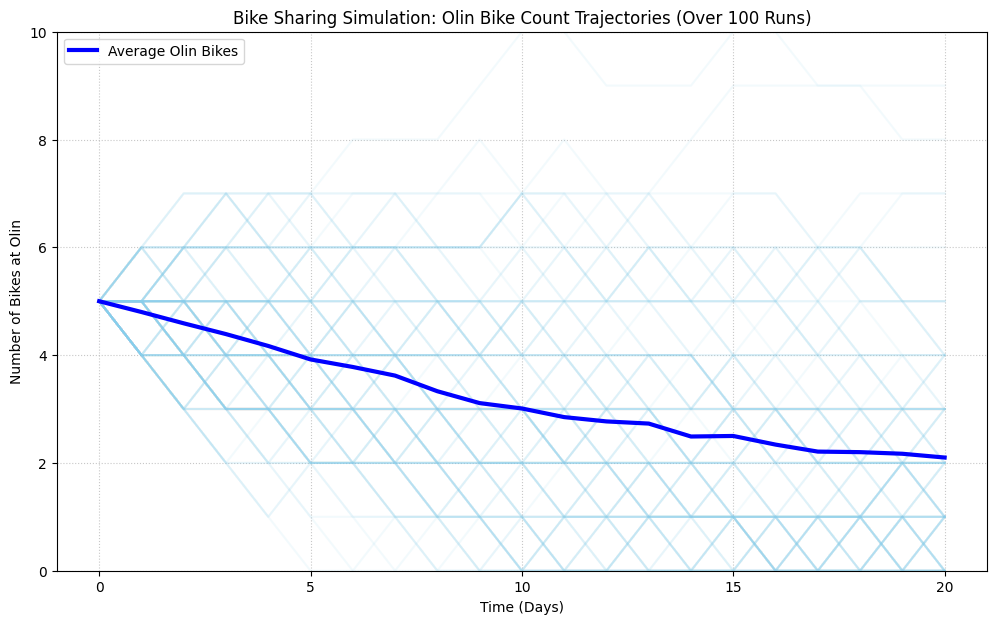

In [28]:
# main.py

from simulation_runner import run_multiple_simulations
from plot_utility import plot_simulation_results

# --- CONFIGURATION (설정) ---
# 시뮬레이션 상수
NUM_ITERATIONS = 100
NUM_DAYS = 20
PROB_O_TO_W = 0.6
PROB_W_TO_O = 1- PROB_O_TO_W

# 초기 상태 상수
INITIAL_STATE = {
    'olin_bikes': 5,
    'wellesley_bikes': 5,
    'total_bikes': 10
}

# --- MAIN EXECUTION (메인 실행) ---

if __name__ == '__main__':
    # 1. 시뮬레이션 반복 실행 및 결과 수집 (simulation_runner.py 사용)
    avg_olin, avg_wellesley, trajectories = run_multiple_simulations(
        INITIAL_STATE, NUM_ITERATIONS, NUM_DAYS, PROB_O_TO_W, PROB_W_TO_O
    )

    # 2. 결과 출력
    print("\n--- Simulation Results (Average over 100 Runs) ---")
    print(f"Number of Iterations: {NUM_ITERATIONS}")
    print(f"Probability Olin -> Wellesley: {PROB_O_TO_W}")
    print(f"Average Final Olin Bikes: {avg_olin:.2f}")
    print(f"Average Final Wellesley Bikes: {avg_wellesley:.2f}")

    # 3. 시각화 (plot_utility.py 사용)
    plot_simulation_results(NUM_DAYS, trajectories, NUM_ITERATIONS, INITIAL_STATE['total_bikes'])

# End of main.py

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
from simulation_runner import run_multiple_simulations

# Install gradio if not already installed. The -q makes it quiet.
!pip install gradio -q

# --- REDEFINITION/OVERRIDE for plot_utility.plot_simulation_results ---
# This function is redefined here because the original plot_utility.py
# calls plt.show(), which is not suitable for returning a matplotlib
# figure to Gradio's gr.Plot component. This local redefinition
# ensures the plot is returned as a Figure object.
def plot_simulation_results_for_gradio(num_days, all_trajectories, num_iterations, initial_total_bikes):
    """
    Plots all trajectories and the mean trajectory, returning a matplotlib Figure object.
    (Modified for Gradio compatibility).
    """
    days = range(num_days + 1)

    # Create a figure and an axes explicitly
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plot all runs lightly in the background
    for history in all_trajectories:
        ax.plot(days, history, color='skyblue', alpha=0.1)

    # Calculate and plot the mean (average) trajectory
    mean_olin_trajectory = [sum(history[d] for history in all_trajectories) / num_iterations for d in days]
    ax.plot(days, mean_olin_trajectory, color='blue', linewidth=3, label='Average Olin Bikes')

    # Graph settings
    ax.set_title(f'Bike Sharing Simulation: Olin Bike Count Trajectories (Over {num_iterations} Runs)')
    ax.set_xlabel('Time (Days)')
    ax.set_ylabel('Number of Bikes at Olin')
    ax.set_ylim(0, initial_total_bikes)
    ax.set_xticks(range(0, num_days + 1, 5))
    ax.legend()
    ax.grid(True, linestyle=':', alpha=0.7)

    return fig # Return the figure object

def bike_simulation_interface(
    initial_olin_bikes: int,
    initial_wellesley_bikes: int,
    num_iterations: int,
    num_days: int,
    prob_o_to_w: float,
    prob_w_to_o: float
):
    # Calculate total bikes
    initial_total_bikes = initial_olin_bikes + initial_wellesley_bikes

    # Prepare initial state
    initial_state = {
        'olin_bikes': initial_olin_bikes,
        'wellesley_bikes': initial_wellesley_bikes,
        'total_bikes': initial_total_bikes
    }

    # Run simulations
    avg_olin, avg_wellesley, trajectories = run_multiple_simulations(
        initial_state, num_iterations, num_days, prob_o_to_w, prob_w_to_o
    )

    # Generate plot using the Gradio-compatible function
    fig = plot_simulation_results_for_gradio(num_days, trajectories, num_iterations, initial_total_bikes)

    # Prepare output text
    output_text = (
        f"--- Simulation Results (Average over {num_iterations} Runs) ---\n"
        f"Number of Iterations: {num_iterations}\n"
        f"Probability Olin -> Wellesley: {prob_o_to_w}\n"
        f"Probability Wellesley -> Olin: {prob_w_to_o}\n"
        f"Average Final Olin Bikes: {avg_olin:.2f}\n"
        f"Average Final Wellesley Bikes: {avg_wellesley:.2f}"
    )

    return fig, output_text

# Define Gradio interface
iface = gr.Interface(
    fn=bike_simulation_interface,
    inputs=[
        gr.Slider(minimum=0, maximum=20, value=6, step=1, label="Initial Olin Bikes"),
        gr.Slider(minimum=0, maximum=20, value=6, step=1, label="Initial Wellesley Bikes"),
        gr.Slider(minimum=10, maximum=500, value=100, step=10, label="Number of Simulations (Iterations)"),
        gr.Slider(minimum=1, maximum=100, value=20, step=1, label="Number of Days per Simulation"),
        gr.Slider(minimum=0.0, maximum=1.0, value=0.6, step=0.05, label="Prob Olin to Wellesley"),
        gr.Slider(minimum=0.0, maximum=1.0, value=0.4, step=0.05, label="Prob Wellesley to Olin")
    ],
    outputs=[
        gr.Plot(label="Olin Bike Count Trajectories"),
        gr.Textbox(label="Simulation Results")
    ],
    title="Bike Sharing System Simulation",
    description="Simulate bike sharing between Olin and Wellesley with configurable parameters."
)

# Launch the Gradio interface with a public share link and debug output for Colab
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ae6cdecc62b9f7381f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


--- Running 500 Simulations (Each 100 Days) ---
--- Running 500 Simulations (Each 20 Days) ---
--- Running 500 Simulations (Each 100 Days) ---
--- Running 500 Simulations (Each 24 Days) ---


## Tunning parameters
### 1. Number of Days per Simulation
### 2. Prob Olin to Wellesley